# Procesamiento de datos obtenidos en corrida final del experimento sobre gestualidad didáctica

José Luis Sánchez G.
Maestría en Lingüística aplicada, UNAM
jlsanchez@comunidad.unam.mx

Ésta es una versión ejecutalbe del procedimiento llevado a cabo para analizar los datos obtenidos en el experimento hecho en diciembre 2021 con estudiantes de alemán de la FES Cuautitlán como parte de un trabajo de titulación de la Maestría en Lingüística Aplicada del Programa de Posgrado en Língüística de la UNAM.

### Importación de módulos

In [1]:
### Se importan los módulos de extracción y procesamiento de datos del archivo xml descargado de Qualtrics
## Se importa el parser para leer el archivo xml
from bs4 import BeautifulSoup
## Biblioteca para plotear los resultados
from matplotlib import pyplot as plt
## Biblioteca para moverse entre directorios
import os
## Biblioteca para extraer expresiones regulares
import re
## Biblioteca de python para análisis de datos
import pandas


### Obtención de las etiquetas de pregunta y los textos de los reactivos principales

In [2]:
### Se prepara el dataframe con las preguntas que se utilizarán
textoPreguntas = pandas.read_csv('textoPreguntas.csv')
## Se obtienen las claves de cada pregunta
ID = textoPreguntas['ID']
## Se obtiene el texto de las preguntas
text = textoPreguntas ['texto']
texto1 = text[3]
texto2 = text[10]
texto3 = text[12]
## Se guarda en una lista texto de los tres reactivos principales
texto = []
texto.append(texto1)
texto.append(texto2)
texto.append(texto3)

print (texto)

[' Ich bereite ein Sandwich vor.', ' Johann steht um sechs Uhr auf.', ' Ich ziehe mich schnell an.']


### Apertura y conversión de archivo xml para su lectura por medio del parser 

In [3]:
with open ('Gestualidad+didáctica+en+la+enseñanza+de+los+verbos+separables+en+la+clase+de+ALE+Condición+SG_December+16,+2021SinCandidatosQueNoVieronVideo.xml', 'r') as f:
     data = f.read()

bs_data = BeautifulSoup(data, 'xml')

### Función para determinar la condición a la que se expusieron los participantes

In [5]:
def tellsConditionsApart():
    umstaende = bs_data.find_all('QID202')
    condicionG = []
    condicionSG = []

    etiqueta = 'QID202'

    for indice, dato in enumerate(umstaende):
        valor = str(dato)
        if valor == f'<{etiqueta}>Aus Dortmund.</{etiqueta}>':
            condicionSG.append(indice)
        elif valor == f'<{etiqueta}>Aus Berlin.</{etiqueta}>':
            condicionSG.append(indice)
        elif valor == f'<{etiqueta}>Aus Hamburg.</{etiqueta}>':
            condicionSG.append(indice)
        else:
            condicionG.append(indice)
    # print ('Participantes en condicion G:', condicionG)
    # print ('Participantes en condicion SG:', condicionSG)
    return condicionG, condicionSG

condicionG, condicionSG = tellsConditionsApart()

print ('CondicionG: ', len(condicionG))
print ('CondicionSG: ', len(condicionSG))

CondicionG:  17
CondicionSG:  11


### Combina las listas resultantes de candidatos según la condición a la que fueron expuestos

In [6]:
combinada = condicionG + condicionSG
combinada.sort()

print ('Combinada: ', combinada)

Combinada:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


### Declaración de las etiquetas identificadoras de las tres preguntas de interés en pre- y post-test

In [7]:
# etiquetasPretest = ['QID94_45', 'QID97_1', 'QID95_1', 'QID98_1', 'QID99_1', 'QID100_1',
# 'QID101_1', 'QID102_1','QID103_1','QID104_1','QID105_1','QID106_1','QID107_15',
# 'QID108_1','QID109_1']

etiquetasPretestDeInteres = ['QID98_1','QID105_1','QID107_15']

# etiquetasPosttest = ['QID187_45', 'QID188_1', 'QID189_1', 'QID190_1', 'QID191_1',
# 'QID192_1', 'QID193_1', 'QID194_1', 'QID195_1', 'QID196_1', 'QID197_1', 'QID198_1',
# 'QID199_15', 'QID200_1', 'QID201_1']

etiquetasPosttestDeInteres = ['QID190_1','QID197_1','QID199_15']

### Función para extraer las respuestas dadas por los participantes según la condición a la que fueron expuestos

In [8]:
def extraeDatos (etiqueta, condicion):
    respuestas = []
    print (etiqueta)
    datos = bs_data.find_all(etiqueta)
    for indice, dato in enumerate(datos):
        if indice in condicion:
            valor = str(dato)
            print (valor)
            #limpio = valor.strip(f'<{etiqueta}>').strip(f'</{etiqueta}>')
            if valor == f'<{etiqueta}>1</{etiqueta}>':
                respuestas.append(1)
            elif valor == f'<{etiqueta}>2</{etiqueta}>':
                respuestas.append(2)
            elif valor == f'<{etiqueta}>3</{etiqueta}>':
                respuestas.append(3)
            elif valor == f'<{etiqueta}>4</{etiqueta}>':
                respuestas.append(4)        # elif valor == '5':
            elif valor == f'<{etiqueta}>5</{etiqueta}>':
                respuestas.append(5)
            # elif valor == f'<{etiqueta}>""</{etiqueta}>':
            #     respuestas.append(0)
            # else:
            #     pass
    print (respuestas)
    print ('+++++++++++++++++++++++++++++++')
    return respuestas

### Programa para extraer y graficar las respuestas

+++++++++++++++++++GRÁFICAS DE LA CONDICIÓN SG+++++++++++++++++++ 





QID190_1
<QID190_1>5</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1>2</QID190_1>
<QID190_1>4</QID190_1>
<QID190_1>4</QID190_1>
<QID190_1>4</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1>1</QID190_1>
<QID190_1>5</QID190_1>
[5, 5, 5, 5, 2, 4, 4, 4, 5, 1, 5]
+++++++++++++++++++++++++++++++
QID98_1
<QID98_1>3</QID98_1>
<QID98_1>5</QID98_1>
<QID98_1>1</QID98_1>
<QID98_1>4</QID98_1>
<QID98_1>1</QID98_1>
<QID98_1>3</QID98_1>
<QID98_1>3</QID98_1>
<QID98_1>4</QID98_1>
<QID98_1>3</QID98_1>
<QID98_1>1</QID98_1>
<QID98_1>2</QID98_1>
[3, 5, 1, 4, 1, 3, 3, 4, 3, 1, 2]
+++++++++++++++++++++++++++++++


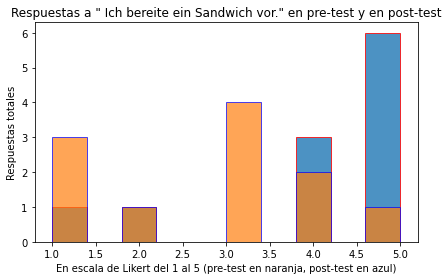

QID197_1
<QID197_1>5</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1>4</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1>3</QID197_1>
<QID197_1>4</QID197_1>
<QID197_1>3</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1>1</QID197_1>
<QID197_1>5</QID197_1>
[5, 5, 4, 5, 5, 3, 4, 3, 5, 1, 5]
+++++++++++++++++++++++++++++++
QID105_1
<QID105_1>5</QID105_1>
<QID105_1>3</QID105_1>
<QID105_1>3</QID105_1>
<QID105_1>3</QID105_1>
<QID105_1>4</QID105_1>
<QID105_1>5</QID105_1>
<QID105_1>4</QID105_1>
<QID105_1>4</QID105_1>
<QID105_1>2</QID105_1>
<QID105_1>3</QID105_1>
<QID105_1>2</QID105_1>
[5, 3, 3, 3, 4, 5, 4, 4, 2, 3, 2]
+++++++++++++++++++++++++++++++


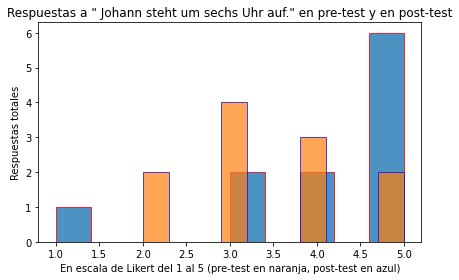

QID199_15
<QID199_15>2</QID199_15>
<QID199_15>5</QID199_15>
<QID199_15>2</QID199_15>
<QID199_15>5</QID199_15>
<QID199_15>1</QID199_15>
<QID199_15>2</QID199_15>
<QID199_15>3</QID199_15>
<QID199_15>2</QID199_15>
<QID199_15>1</QID199_15>
<QID199_15>2</QID199_15>
<QID199_15>2</QID199_15>
[2, 5, 2, 5, 1, 2, 3, 2, 1, 2, 2]
+++++++++++++++++++++++++++++++
QID107_15
<QID107_15>4</QID107_15>
<QID107_15>5</QID107_15>
<QID107_15>1</QID107_15>
<QID107_15>3</QID107_15>
<QID107_15>1</QID107_15>
<QID107_15>3</QID107_15>
<QID107_15>3</QID107_15>
<QID107_15>3</QID107_15>
<QID107_15>3</QID107_15>
<QID107_15>2</QID107_15>
<QID107_15>2</QID107_15>
[4, 5, 1, 3, 1, 3, 3, 3, 3, 2, 2]
+++++++++++++++++++++++++++++++


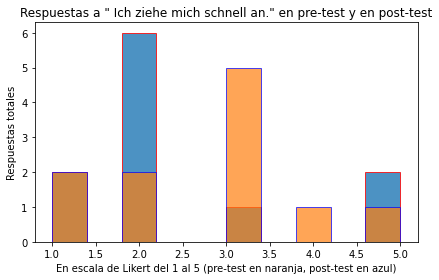

+++++++++++++++++++GRÁFICAS DE LA CONDICIÓN G+++++++++++++++++++ 





QID190_1
<QID190_1/>
<QID190_1>5</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1/>
<QID190_1/>
<QID190_1>5</QID190_1>
<QID190_1>4</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1>4</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1>5</QID190_1>
<QID190_1/>
[5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5]
+++++++++++++++++++++++++++++++
QID98_1
<QID98_1/>
<QID98_1>1</QID98_1>
<QID98_1>3</QID98_1>
<QID98_1>4</QID98_1>
<QID98_1>5</QID98_1>
<QID98_1/>
<QID98_1/>
<QID98_1>5</QID98_1>
<QID98_1>4</QID98_1>
<QID98_1>4</QID98_1>
<QID98_1>5</QID98_1>
<QID98_1>1</QID98_1>
<QID98_1>5</QID98_1>
<QID98_1>2</QID98_1>
<QID98_1>3</QID98_1>
<QID98_1>5</QID98_1>
<QID98_1/>
[1, 3, 4, 5, 5, 4, 4, 5, 1, 5, 2, 3, 5]
+++++++++++++++++++++++++++++++


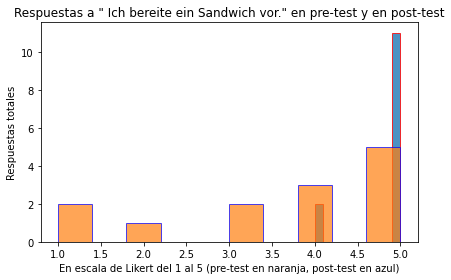

QID197_1
<QID197_1/>
<QID197_1>5</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1/>
<QID197_1/>
<QID197_1>5</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1>4</QID197_1>
<QID197_1>5</QID197_1>
<QID197_1>3</QID197_1>
<QID197_1/>
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 3]
+++++++++++++++++++++++++++++++
QID105_1
<QID105_1/>
<QID105_1>2</QID105_1>
<QID105_1>4</QID105_1>
<QID105_1>5</QID105_1>
<QID105_1>1</QID105_1>
<QID105_1/>
<QID105_1/>
<QID105_1>1</QID105_1>
<QID105_1>4</QID105_1>
<QID105_1>5</QID105_1>
<QID105_1>4</QID105_1>
<QID105_1>3</QID105_1>
<QID105_1>5</QID105_1>
<QID105_1>4</QID105_1>
<QID105_1>1</QID105_1>
<QID105_1>5</QID105_1>
<QID105_1/>
[2, 4, 5, 1, 1, 4, 5, 4, 3, 5, 4, 1, 5]
+++++++++++++++++++++++++++++++


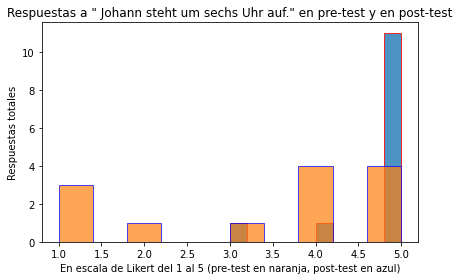

QID199_15
<QID199_15/>
<QID199_15>5</QID199_15>
<QID199_15>5</QID199_15>
<QID199_15>5</QID199_15>
<QID199_15>5</QID199_15>
<QID199_15/>
<QID199_15/>
<QID199_15>5</QID199_15>
<QID199_15>3</QID199_15>
<QID199_15>5</QID199_15>
<QID199_15>5</QID199_15>
<QID199_15>5</QID199_15>
<QID199_15>5</QID199_15>
<QID199_15>5</QID199_15>
<QID199_15>5</QID199_15>
<QID199_15>5</QID199_15>
<QID199_15/>
[5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5]
+++++++++++++++++++++++++++++++
QID107_15
<QID107_15/>
<QID107_15>5</QID107_15>
<QID107_15>2</QID107_15>
<QID107_15>5</QID107_15>
<QID107_15>2</QID107_15>
<QID107_15/>
<QID107_15/>
<QID107_15>4</QID107_15>
<QID107_15>3</QID107_15>
<QID107_15>5</QID107_15>
<QID107_15>2</QID107_15>
<QID107_15>1</QID107_15>
<QID107_15>5</QID107_15>
<QID107_15>4</QID107_15>
<QID107_15>5</QID107_15>
<QID107_15>2</QID107_15>
<QID107_15/>
[5, 2, 5, 2, 4, 3, 5, 2, 1, 5, 4, 5, 2]
+++++++++++++++++++++++++++++++


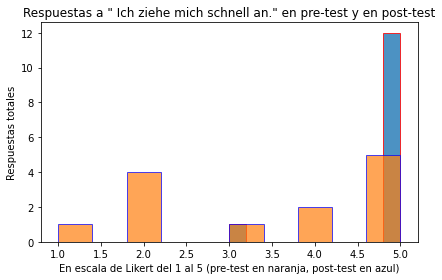

In [10]:
def extraeYGraficaRespuestas (etiquetas, condicion):
    for i, etiqueta in enumerate(etiquetas):
        posTest = extraeDatos (etiqueta, condicion)
        preTest = extraeDatos (etiquetasPretestDeInteres[i], condicion)
        # respuestas = extraeDatos (etiqueta, condicionSG)
        # ripostas = extraeDatos (etiqueta, condicionG)
        plt.title(f'Respuestas a "{texto[i]}" en pre-test y en post-test')
        #plt.style.use('fivethirtyeight')
        plt.hist(posTest, label='series1', alpha=.8, edgecolor='red')
        plt.hist(preTest, label='series2', alpha=0.7, edgecolor='blue')
        # plt.hist(respuestas)
        # plt.hist(respuestas)
        plt.xlabel('En escala de Likert del 1 al 5 (pre-test en naranja, post-test en azul)' )
        plt.ylabel('Respuestas totales')
        plt.tight_layout()
        plt.show()

print ('+++++++++++++++++++GRÁFICAS DE LA CONDICIÓN SG+++++++++++++++++++', '\n'*5)
resultados = extraeYGraficaRespuestas (etiquetasPosttestDeInteres, condicionSG)
print ('+++++++++++++++++++GRÁFICAS DE LA CONDICIÓN G+++++++++++++++++++', '\n'*5)
resultados2 = extraeYGraficaRespuestas (etiquetasPosttestDeInteres, condicionG)

### Sumas manuales divididas por pre-test, post-test y condición 

In [11]:
postTestG = [5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 3, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5]
pretestG = [1, 3, 4, 5, 5, 4, 4, 5, 1, 5, 2, 3, 5, 2, 4, 5, 1, 1, 4, 5, 4, 3, 5, 4, 1, 5, 5, 2, 5, 2, 4, 3, 5, 2, 1, 5, 4, 5, 2]
postTestSG = [5, 5, 5, 5, 2, 4, 4, 4, 5, 1, 5, 5, 5, 4, 5, 5, 3, 4, 3, 5, 1, 5, 2, 5, 2, 5, 1, 2, 3, 2, 1, 2, 2]
pretestSG = [3, 5, 1, 4, 1, 3, 3, 4, 3, 1, 2, 5, 3, 3, 3, 4, 5, 4, 4, 2, 3, 2, 4, 5, 1, 3, 1, 3, 3, 3, 3, 2, 2]

### Ploteo de las respuestas integradas de los tres reactivos principales en pre- y post-test

[12.121212121212121, 21.21212121212121, 9.090909090909092, 15.151515151515152, 42.42424242424242]
[15.151515151515152, 15.151515151515152, 39.39393939393939, 18.181818181818183, 12.121212121212121]


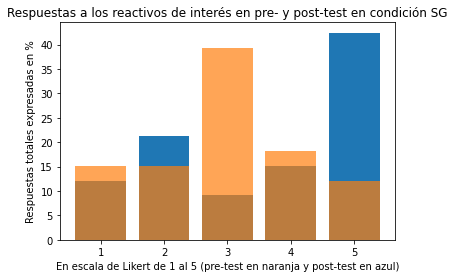

[0.0, 0.0, 5.128205128205128, 7.6923076923076925, 87.17948717948718]
[15.384615384615385, 15.384615384615385, 10.256410256410255, 23.076923076923077, 35.8974358974359]


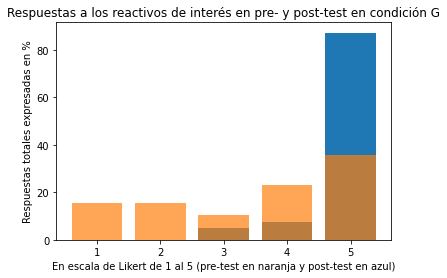

In [12]:
grades = [ str(i) for i in range (1,6)]

def obtieneConteos (lista):
    conteos = []
    for valor in grades:
        sum = 0
        for element in lista:
            if element == int(valor):
                sum += 1
        conteos.append((sum/len(lista))*100)
        #print (sum)

    print (conteos)
    return conteos
##### Trozo de código para dibujar las respuestas integradas en condición SG
postTestSinGestulidad = obtieneConteos(postTestSG)
preTestSinGestulidad = obtieneConteos(pretestSG)

plt.bar(range(len(grades)), postTestSinGestulidad)
plt.bar(range(len(grades)), preTestSinGestulidad, alpha=0.7)
plt.title('Respuestas a los reactivos de interés en pre- y post-test en condición SG')
plt.xlabel('En escala de Likert de 1 al 5 (pre-test en naranja y post-test en azul)')
plt.ylabel('Respuestas totales expresadas en %')
plt.xticks(range(len(grades)), grades)
plt.show()

##### Trozo de código para dibujar las respuestas integradas en condición G
postTestConGestulidad = obtieneConteos(postTestG)
preTestConGestulidad = obtieneConteos(pretestG)

plt.bar(range(len(grades)), postTestConGestulidad)
plt.bar(range(len(grades)), preTestConGestulidad, alpha=0.7)
plt.title('Respuestas a los reactivos de interés en pre- y post-test en condición G')
plt.xlabel('En escala de Likert de 1 al 5 (pre-test en naranja y post-test en azul)')
plt.ylabel('Respuestas totales expresadas en %')
plt.xticks(range(len(grades)), grades)
plt.show()


# Pruebas de estadística inferencial
En esta parte se desarrolla la prueba estadística t de muestras independientes

### Importación de los módulos necesarios y asignación de datos por condición a variables

In [13]:
import pandas as pd
import math
###Se pasan los datos de los promedios de respuesta de los  participantes a un dataframe de pandas
sujetos = pd.read_csv('smokerOrNot.csv')
print (sujetos)

    CondG  CondSG
0      15    12.0
1      15    15.0
2      15    11.0
3      15    15.0
4      15     8.0
5      12     9.0
6      15    11.0
7      15     9.0
8      15    11.0
9      15     4.0
10     13    12.0
11     15     NaN
12     13     NaN


In [14]:
###Se asignan los datos de cada condición a una serie
sg = sujetos['CondSG']
g = sujetos['CondG']

### Obtención de las medias, las medidas de desviación y los cuadrados de éstas para determinar la varianza

In [15]:
#Se sacan las medias de cada una de las series
sgmean = sg.mean() #media de las respuestas dadas por los sujetos en la condición SG
gmean = g.mean() #media de las respuestas dadas por los sujetos en la condición G

print('La media de las respuestas dadas por los candidatos expuestos a la condición SG es: ',sgmean)
print('La media de las respuestas dadas por los candidatos expuestos a la condición G es: ',gmean)
print ('\n'*3)

La media de las respuestas dadas por los candidatos expuestos a la condición SG es:  10.636363636363637
La media de las respuestas dadas por los candidatos expuestos a la condición G es:  14.461538461538462






In [16]:
sg = sujetos['CondSG']
#Se saca la desviación de los sujetos en condición SG y se aumenta como columna al dataframe
sujetos ['Desviacion_SG'] = [i for i in sg-sgmean]
#Se saca la desviación al cuadrado de los sujetos en condición SG para evitar números negativos
#y se aumenta como columna al dataframe (df)
sujetos ['Desviacion_SG_Al_Cuadrado'] = [i for i in (sg-sgmean)**2]
#Se obtiene una serie de la columna aumentada al df en el paso anterior
SquareSG = sujetos ['Desviacion_SG_Al_Cuadrado']
#print ('longitud de SquareSG: ',len(SquareSG))
#Para obtener la varianza de SquareSG se suman los datos y se dividen por el
#número de sujetos en esa condición menos uno
varianzaSG = SquareSG.sum()/10

#Se saca la desviación de los sujetos en condición G y se aumenta como columna al df
sujetos ['Desviacion_G'] = [i for i in g-gmean]

#Se saca la desviación al cuadrado de los sujetos en condición G para evitar números negativos
#y se aumenta como columna al df
sujetos ['Desviación_G_Al_Cuadrado'] = [i for i in (g-gmean)**2]

#Se imprime el dataframe para ver si tiene todas las columnas necesarias
print (sujetos)

#Se obtiene una serie de la columna aumentada al df en el paso anterior
SquareG = sujetos ['Desviación_G_Al_Cuadrado']

#Para obtener la varianza de SquareG se suman los datos y se dividen por el
#número de sujetos en esa condición menos uno
print (f'{SquareSG.sum()} es la suma del cuadrado de las desviaciones en condición SG.' )
print (f'{SquareG.sum()} es la suma del cuadrado de las desviaciones en condición G.', )
print ('\n'*3)
varianzaG = SquareG.sum()/12 ###La varianza parece ser el promedio de la desviación estándar al cuadrado
print (f'{varianzaSG} es la varianza de los candidatos expuestos a la condición SG.' )
print (f'{varianzaG}La varianza de los candidatos expuestos a la condición G.')

    CondG  CondSG  Desviacion_SG  Desviacion_SG_Al_Cuadrado  Desviacion_G  \
0      15    12.0       1.363636                   1.859504      0.538462   
1      15    15.0       4.363636                  19.041322      0.538462   
2      15    11.0       0.363636                   0.132231      0.538462   
3      15    15.0       4.363636                  19.041322      0.538462   
4      15     8.0      -2.636364                   6.950413      0.538462   
5      12     9.0      -1.636364                   2.677686     -2.461538   
6      15    11.0       0.363636                   0.132231      0.538462   
7      15     9.0      -1.636364                   2.677686      0.538462   
8      15    11.0       0.363636                   0.132231      0.538462   
9      15     4.0      -6.636364                  44.041322      0.538462   
10     13    12.0       1.363636                   1.859504     -1.461538   
11     15     NaN            NaN                        NaN      0.538462   

### Obtención del valor T calculado, el valor T crítico y comparación de éstos para obtener el resultado final 

In [17]:
#Se aplica la fórmula para obtener el valor t. "That's the t value associated
#with the independent sample t-test"
t = (gmean-sgmean)/(math.sqrt((varianzaG/13)+(varianzaSG/11)))

print ('T-calculated es igual a: ',t)

T-calculated es igual a:  3.862669433583081


In [22]:
#Se establecen los grados de libertad. "Sample size 1 plus sample size 2 minus two"
df = 11+13-2
#Se establece el valor de referencia para el rango de error aceptable
alpha = 0.05
#El valor de t crítica se obtiene de una tabla cruzando los grados de libertad con el número alpha
criticalTValue = 2.074
#Se imprime si se puede o no desechar la H0
if t>criticalTValue:
    print (f'El t-value calculado es {t}, es decir {t-criticalTValue} más grande que el criticalTValue de {criticalTValue}, por lo tanto, se puede desechar la H0.')
else:
    print ('No se puede desechar la H0.')

El t-value calculado es 3.862669433583081, es decir 1.788669433583081 más grande que el criticalTValue de 2.074, por lo tanto, se puede desechar la H0.
